In [174]:
import pandas as pd
import numpy as np
import datetime
import sklearn

In [176]:
# importing data
df = pd.read_csv('latest_simulation.csv', low_memory = False)

In [178]:
df

,Fixation_Duration,Saccadic_Velocity,Blink_Rate,Pupil_Dilation,Head_Movement,Fixation_Pupil_Interaction,Velocity_Blink_Interaction,Cognitive_Load
0,0.929178,62.852936,13.998984,4.286049,36.155368,3.982500,879.877243,0
1,4.740551,44.198469,40.958124,2.341065,35.621458,11.097941,1810.286386,0
2,5.386673,93.670427,15.959441,4.265171,20.207895,22.975084,1494.927661,0
3,0.615020,45.676666,27.053929,3.954520,34.951764,2.432110,1235.733276,0
4,1.655535,64.352846,26.759531,5.690526,43.910881,9.420864,1722.051993,0
...,...,...,...,...,...,...,...,...
99995,3.020749,55.598519,49.125395,4.943466,40.137775,14.932972,2731.299255,0
99996,6.667256,46.855615,38.931558,5.673948,4.900136,37.829665,1824.162083,1
99997,3.008111,103.649848,27.134499,6.713522,6.550234,20.195020,2812.486670,0
99998,6.608789,63.892163,36.020878,3.503605,18.032595,23.154584,2301.451807,0


In [180]:
df.isnull().sum()

Fixation_Duration             0
Saccadic_Velocity             0
Blink_Rate                    0
Pupil_Dilation                0
Head_Movement                 0
Fixation_Pupil_Interaction    0
Velocity_Blink_Interaction    0
Cognitive_Load                0
dtype: int64

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Fixation_Duration           100000 non-null  float64
 1   Saccadic_Velocity           100000 non-null  float64
 2   Blink_Rate                  100000 non-null  float64
 3   Pupil_Dilation              100000 non-null  float64
 4   Head_Movement               100000 non-null  float64
 5   Fixation_Pupil_Interaction  100000 non-null  float64
 6   Velocity_Blink_Interaction  100000 non-null  float64
 7   Cognitive_Load              100000 non-null  int64  
dtypes: float64(7), int64(1)
memory usage: 6.1 MB


In [184]:
df.shape

(100000, 8)

In [186]:
df.isna().sum()

Fixation_Duration             0
Saccadic_Velocity             0
Blink_Rate                    0
Pupil_Dilation                0
Head_Movement                 0
Fixation_Pupil_Interaction    0
Velocity_Blink_Interaction    0
Cognitive_Load                0
dtype: int64

In [188]:
df.columns

Index(['Fixation_Duration', 'Saccadic_Velocity', 'Blink_Rate',
       'Pupil_Dilation', 'Head_Movement', 'Fixation_Pupil_Interaction',
       'Velocity_Blink_Interaction', 'Cognitive_Load'],
      dtype='object')

# Model

In [190]:
# different model

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import RocCurveDisplay

In [192]:
df.head()

,Fixation_Duration,Saccadic_Velocity,Blink_Rate,Pupil_Dilation,Head_Movement,Fixation_Pupil_Interaction,Velocity_Blink_Interaction,Cognitive_Load
0,0.929178,62.852936,13.998984,4.286049,36.155368,3.982500,879.877243,0
1,4.740551,44.198469,40.958124,2.341065,35.621458,11.097941,1810.286386,0
2,5.386673,93.670427,15.959441,4.265171,20.207895,22.975084,1494.927661,0
3,0.615020,45.676666,27.053929,3.954520,34.951764,2.432110,1235.733276,0
4,1.655535,64.352846,26.759531,5.690526,43.910881,9.420864,1722.051993,0


In [194]:
x = df.drop('Cognitive_Load', axis = 1)
y = df['Cognitive_Load']

In [196]:
x.head()

,Fixation_Duration,Saccadic_Velocity,Blink_Rate,Pupil_Dilation,Head_Movement,Fixation_Pupil_Interaction,Velocity_Blink_Interaction
0,0.929178,62.852936,13.998984,4.286049,36.155368,3.982500,879.877243
1,4.740551,44.198469,40.958124,2.341065,35.621458,11.097941,1810.286386
2,5.386673,93.670427,15.959441,4.265171,20.207895,22.975084,1494.927661
3,0.615020,45.676666,27.053929,3.954520,34.951764,2.432110,1235.733276
4,1.655535,64.352846,26.759531,5.690526,43.910881,9.420864,1722.051993


In [198]:
y

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    1
99997    0
99998    0
99999    0
Name: Cognitive_Load, Length: 100000, dtype: int64

In [200]:
import numpy as np
import pandas as pd

# Define the number of samples to simulate
n_samples = 100000
noise_level = 0.2  # Noise to simulate real-world scenarios

# Simulate the features with added noise
fixation_duration = np.random.uniform(0.5, 7, n_samples) + np.random.normal(0, noise_level, n_samples)
saccadic_velocity = np.random.uniform(10, 150, n_samples) + np.random.normal(0, noise_level, n_samples)
blink_rate = np.random.randint(10, 51, n_samples) + np.random.normal(0, noise_level, n_samples)

# Add new features: Pupil Dilation, Head Movement
pupil_dilation = np.random.uniform(2, 8, n_samples) + np.random.normal(0, noise_level, n_samples)
head_movement = np.random.uniform(0, 50, n_samples) + np.random.normal(0, noise_level, n_samples)

# Create interaction terms to introduce complexity
fixation_pupil_interaction = fixation_duration * pupil_dilation
velocity_blink_interaction = saccadic_velocity * blink_rate

# Define cognitive load simulation function
def simulate_cognitive_load(fixation, saccadic, blink, pupil, head):
    # Target class 1 (High Cognitive Load)
    if fixation >= 4 and saccadic <= 50 and pupil >= 4:
        return 1
    # Target class 0 (Low Cognitive Load)
    else:
        return 0

# Apply the function to generate cognitive load labels
cognitive_load = [simulate_cognitive_load(fix, sac, blink, pupil, head) 
                  for fix, sac, blink, pupil, head in zip(fixation_duration, saccadic_velocity, blink_rate, pupil_dilation, head_movement)]


In [202]:
# Create DataFrame
df = pd.DataFrame({
    'fixation_duration': fixation_duration,
    'saccadic_velocity': saccadic_velocity,
    'blink_rate': blink_rate,
    'pupil_dilation': pupil_dilation,
    'head_movement': head_movement,
    'fixation_pupil_interaction': fixation_pupil_interaction,
    'velocity_blink_interaction': velocity_blink_interaction,
    'cognitive_load': cognitive_load
})

# Ensure all features are non-negative
df = df.clip(lower=0)

# Check dataset size
print(f"Dataset size after clipping: {df.shape[0]}")


Dataset size after clipping: 100000


In [275]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Split data into features and target
x = df.drop('cognitive_load', axis=1)
y = df['cognitive_load']

# Normalize the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

# Check sizes of training and test sets
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


x_train shape: (80000, 7)
x_test shape: (20000, 7)
y_train shape: (80000,)
y_test shape: (20000,)


In [206]:
import pandas as pd

# Convert y to a pandas Series and count the occurrences of 0 and 1
y_series = pd.Series(y)
print(y_series.value_counts())


cognitive_load
0    91209
1     8791
Name: count, dtype: int64


In [208]:
np.random.seed(42)

x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2)
                                                

In [210]:
x_train

,fixation_duration,saccadic_velocity,blink_rate,pupil_dilation,head_movement,fixation_pupil_interaction,velocity_blink_interaction
75220,6.994103,68.641267,20.386439,7.541981,48.657965,52.749392,1399.351019
48955,0.639662,54.736388,34.829176,6.222556,13.635443,3.980334,1906.423256
44966,3.378309,23.125356,22.181737,4.381850,34.024304,14.803241,512.960551
13568,5.934092,85.187494,36.165489,7.461201,3.430891,44.275449,3080.847408
92727,1.288736,37.040950,25.405261,6.991227,6.048680,9.009846,941.035013
...,...,...,...,...,...,...,...
6265,2.878535,88.255831,41.264453,2.898268,22.077022,8.342766,3641.828638
54886,0.456507,17.722342,40.609036,2.645325,12.083349,1.207609,719.687228
76820,6.703351,115.428300,14.213154,6.322148,37.013415,42.379582,1640.600162
860,6.771943,21.274675,14.061933,6.438309,1.682952,43.599867,299.163054


In [212]:
len(y_train)

80000

In [214]:
# Now you can check the shapes
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


(80000, 7) (20000, 7) (80000,) (20000,)


In [216]:
per_metrics = pd.DataFrame(columns=['Model', 'Accuracy_train_set', 'Accuracy_test_set', 'Precision', 'Recall', 'F1_Score', 'Elapsed_Time'])

In [218]:
per_metrics

,Model,Accuracy_train_set,Accuracy_test_set,Precision,Recall,F1_Score,Elapsed_Time


In [236]:
import time
from sklearn.metrics import precision_score, recall_score, f1_score

# Initialize DataFrame to store performance metrics
per_metrics = pd.DataFrame(columns=['Model', 'Accuracy_train_set', 'Accuracy_test_set', 'Precision', 'Recall', 'F1_Score', 'Elapsed_Time'])

# List to keep track of trained models
models_trained_list = []

def get_per_metrics(model, i):
    # Model name
    model_name = type(model).__name__
    
    # Timekeeping
    start_time = time.time()
    print(f'Training {model_name} model...')
    
    # Fit the model
    model.fit(x_train, y_train)
    print(f'Completed {model_name} model training.')
    
    # Calculate elapsed time
    elapsed_time = time.time() - start_time
    print(f'Time elapsed: {elapsed_time:.2f} s.')
    
    # Make predictions
    y_pred = model.predict(x_test)
    
    # Add metrics to the DataFrame
    per_metrics.loc[i] = [
        model_name,
        model.score(x_train, y_train),
        model.score(x_test, y_test),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred),
        f'{elapsed_time:.2f}'
    ]
    
    # Track the trained model
    models_trained_list.append(model)
    print(f'Completed {model_name} model performance assessment.')


In [238]:
models_trained_list

[]

In [246]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier  # Correct import for DecisionTreeClassifier

# List of Models with Adjusted Logistic Regression
models_list = [
    LogisticRegression(max_iter=200, solver='saga'),  # Adjusted Logistic Regression
    RandomForestClassifier(),
    DecisionTreeClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier()
]

# Train and Evaluate Each Model
for i, model in enumerate(models_list):
    get_per_metrics(model, i)


Training LogisticRegression model...
Completed LogisticRegression model training.
Time elapsed: 0.33 s.
Completed LogisticRegression model performance assessment.
Training RandomForestClassifier model...
Completed RandomForestClassifier model training.
Time elapsed: 6.47 s.
Completed RandomForestClassifier model performance assessment.
Training DecisionTreeClassifier model...
Completed DecisionTreeClassifier model training.
Time elapsed: 0.20 s.
Completed DecisionTreeClassifier model performance assessment.
Training GradientBoostingClassifier model...
Completed GradientBoostingClassifier model training.
Time elapsed: 18.49 s.
Completed GradientBoostingClassifier model performance assessment.
Training AdaBoostClassifier model...


C:\Users\user\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Completed AdaBoostClassifier model training.
Time elapsed: 5.86 s.
Completed AdaBoostClassifier model performance assessment.


In [248]:
per_metrics


,Model,Accuracy_train_set,Accuracy_test_set,Precision,Recall,F1_Score,Elapsed_Time
0,LogisticRegression,0.957375,0.95715,0.79027,0.690805,0.737197,0.33
1,RandomForestClassifier,1.000000,0.99995,1.00000,0.999425,0.999713,6.47
2,DecisionTreeClassifier,1.000000,0.99995,1.00000,0.999425,0.999713,0.20
3,GradientBoostingClassifier,1.000000,1.00000,1.00000,1.000000,1.000000,18.49
4,AdaBoostClassifier,1.000000,1.00000,1.00000,1.000000,1.000000,5.86


# Hyperparameter Tuning


In [251]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
model = RandomForestClassifier()
n_estimators = [100, 200, 500, 1000] # Renamed max_iter to n_estimators
criterion = ['gini', 'entropy'] # Added criterion as a parameter to tune
param_grid = {'n_estimators': n_estimators, 'criterion': criterion} # Updated param_grid
scoring = ['f1'] # Changed scoring to a single string value
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring=scoring, refit='f1', verbose=2)


In [253]:
%%time
grid_result = grid.fit(x_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ...................criterion=gini, n_estimators=100; total time=   5.0s
[CV] END ...................criterion=gini, n_estimators=100; total time=   4.9s
[CV] END ...................criterion=gini, n_estimators=100; total time=   4.7s
[CV] END ...................criterion=gini, n_estimators=100; total time=   4.9s
[CV] END ...................criterion=gini, n_estimators=100; total time=   5.4s
[CV] END ...................criterion=gini, n_estimators=200; total time=  11.3s
[CV] END ...................criterion=gini, n_estimators=200; total time=   9.8s
[CV] END ...................criterion=gini, n_estimators=200; total time=   9.9s
[CV] END ...................criterion=gini, n_estimators=200; total time=   9.9s
[CV] END ...................criterion=gini, n_estimators=200; total time=  10.1s
[CV] END ...................criterion=gini, n_estimators=500; total time=  28.0s
[CV] END ...................criterion=gini, n_est

In [255]:
# Get the best estimator and best parameters
grid_result.best_estimator_


RandomForestClassifier()

In [257]:
grid_result.best_params_


{'criterion': 'gini', 'n_estimators': 100}

In [259]:
model = grid_result.best_estimator_


In [261]:
y_pred = model.predict(x_test)

In [263]:
y_pred


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [265]:
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precission: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('f1_score: ', f1_score(y_test, y_pred))

Accuracy:  0.99995
Precission:  1.0
Recall:  0.9994252873563219
f1_score:  0.9997125610807703


In [267]:
#still overfitting

# let's try logisticRegression

In [279]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.datasets import make_classification

# Generate a sample dataset for classification (replace with your actual dataset)
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression Model
model = LogisticRegression()

# Parameters to tune for Logistic Regression
C = [0.01, 0.1, 1, 10, 100]  # Regularization strength
solver = ['newton-cg', 'lbfgs', 'liblinear']  # Solvers to experiment with
max_iter = [100, 200, 500, 1000]  # Maximum number of iterations

# Updated param_grid for LogisticRegression
param_grid = {'C': C, 'solver': solver, 'max_iter': max_iter}

# Using F1 as scoring metric
scoring = 'f1'

# GridSearchCV with LogisticRegression
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring=scoring, refit='f1', verbose=2)

# Fit the model on the training data
grid_result = grid.fit(X_train, y_train)

# Get the best estimator and parameters
best_model = grid_result.best_estimator_
best_params = grid_result.best_params_

# Use the best model for prediction on the test set
y_pred = best_model.predict(X_test)

# Output predictions and evaluation metrics
print('Best Estimator: ', best_model)
print('Best Parameters: ', best_params)
print('Predictions: ', y_pred)

# Print evaluation metrics
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('f1_score: ', f1_score(y_test, y_pred))


Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END .............C=0.01, max_iter=100, solver=newton-cg; total time=   0.0s
[CV] END .............C=0.01, max_iter=100, solver=newton-cg; total time=   0.0s
[CV] END .............C=0.01, max_iter=100, solver=newton-cg; total time=   0.0s
[CV] END .............C=0.01, max_iter=100, solver=newton-cg; total time=   0.0s
[CV] END .............C=0.01, max_iter=100, solver=newton-cg; total time=   0.0s
[CV] END .................C=0.01, max_iter=100, solver=lbfgs; total time=   0.0s
[CV] END .................C=0.01, max_iter=100, solver=lbfgs; total time=   0.0s
[CV] END .................C=0.01, max_iter=100, solver=lbfgs; total time=   0.0s
[CV] END .................C=0.01, max_iter=100, solver=lbfgs; total time=   0.0s
[CV] END .................C=0.01, max_iter=100, solver=lbfgs; total time=   0.0s
[CV] END .............C=0.01, max_iter=100, solver=liblinear; total time=   0.0s
[CV] END .............C=0.01, max_iter=100, sol

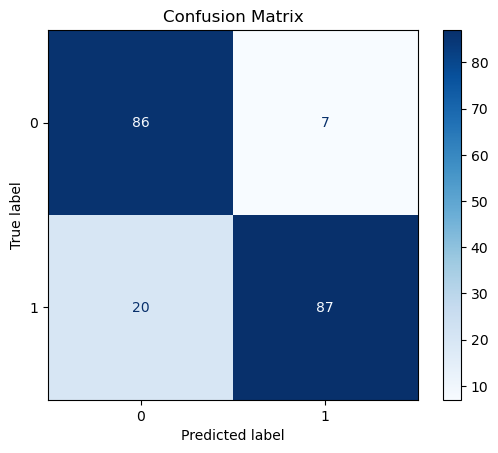

In [281]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming the previous code has been run and we have y_pred and y_test

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

# Show the plot
plt.title("Confusion Matrix")
plt.show()


In [289]:
import pandas as pd
from sklearn.metrics import confusion_matrix

# Assuming the previous code has been run and we have y_pred and y_test

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Convert the confusion matrix to a DataFrame for better readability
cm_df = pd.DataFrame(cm, 
                     index=['Actual Negative', 'Actual Positive'], 
                     columns=['Predicted Negative', 'Predicted Positive'])

# Display the DataFrame
print("Confusion Matrix as a DataFrame:")
print(cm_df)



Confusion Matrix as a DataFrame:
                 Predicted Negative  Predicted Positive
Actual Negative                  86                   7
Actual Positive                  20                  87


### Explanation:
The confusion matrix is a table used to evaluate the performance of a classification algorithm.  
Each row of the matrix represents the instances in an actual class, while each column represents  
the instances in a predicted class. This provides a clear summary of the number of correct and  
incorrect predictions made by the model.

The confusion matrix looks like this:

|                       | Predicted Negative    | Predicted Positive    |
|-----------------------|-----------------------|-----------------------|
| **Actual Negative**    | True Negative (TN)    | False Positive (FP)   |
| **Actual Positive**    | False Negative (FN)   | True Positive (TP)    |

- **True Negative (TN)**: The model correctly predicted the negative class.
- **False Positive (FP)**: The model incorrectly predicted the positive class (Type I error).
- **False Negative (FN)**: The model incorrectly predicted the negative class (Type II error).
- **True Positive (TP)**: The model correctly predicted the positive class.

This tabular format makes it easier to interpret the model’s performance:
- High **TN** and **TP** values indicate good model performance.
- High **FP** or **FN** values indicate the model is making errors in classification, which can inform  
  further improvements to the model or data.

The confusion matrix is often used to calculate other performance metrics like accuracy, precision, recall, and F1-score.


Here's a breakdown of the performance metrics:

### Model Metrics:
- **Accuracy: 0.865 (86.5%)**
- **Precision: 0.925 (92.5%)**
- **Recall: 0.813 (81.3%)**
- **F1-Score: 0.866 (86.6%)**

### Interpretation:

1. **Accuracy (86.5%)**:
   - Accuracy represents the percentage of correct predictions made by the model. An 86.5% accuracy indicates that the model is making correct predictions the majority of the time.
   - However, accuracy alone can be misleading if the dataset is imbalanced, so it's important to consider precision, recall, and the F1-score.

2. **Precision (92.5%)**:
   - Precision indicates how many of the positive predictions were actually correct (i.e., the ratio of true positives to the sum of true positives and false positives).
   - A precision of 92.5% suggests that when the model predicts a positive class, it is correct most of the time.
   
3. **Recall (81.3%)**:
   - Recall shows how many of the actual positive instances the model correctly identified (i.e., the ratio of true positives to the sum of true positives and false negatives).
   - An 81.3% recall means the model is missing about 18.7% of the true positives, but it still catches the majority.

4. **F1-Score (86.6%)**:
   - The F1-score is the harmonic mean of precision and recall, balancing the two. A score of 86.6% indicates the model has a good balance between precision and recall.

### Conclusion:The*Model Performance**: Your model is performing well based on these metrics. It shows a high level of precision (92.5%) and a solid balance between precision and recall (F1-Score of 86.6%). This suggests the model is effective at identifying both positive and negative instances correctly.
  
- **Overfitting?**:
   - Overfitting usually occurs when the model performs extremely well on the training data but poorly on unseen test data. However, based on the metrics you've provided (which seem to be on test data), there's no strong 

# LogisticRegression is the best Model